In [29]:
import os
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import secrets
from Crypto.Cipher import AES
from Crypto.Util.Padding import pad, unpad

In [30]:
# Ruta de la imagen BMP
image_path = "Moully.bmp" 

# Cargar la imagen en escala de grises
img = Image.open(image_path).convert("L")

# Convertir la imagen a bytes
img_bytes = np.array(img).tobytes()

In [31]:
# Generación de clave AES y IV
def generate_aes_key():
    """Genera una clave aleatoria de 256 bits (32 bytes) para AES."""
    return secrets.token_bytes(32)

def generate_iv():
    """Genera un IV aleatorio de 16 bytes (128 bits) para AES-CBC."""
    return secrets.token_bytes(16)

# Generamos clave y IV
key = generate_aes_key()
iv = generate_iv()

In [32]:
# Cifrado AES en ECB
def encrypt_aes_ecb(data, key):
    """Cifra los datos usando AES en modo ECB."""
    cipher = AES.new(key, AES.MODE_ECB)
    encrypted_data = cipher.encrypt(pad(data, AES.block_size))  # Aplica padding automático
    return encrypted_data

# Cifrado AES en CBC
def encrypt_aes_cbc(data, key, iv):
    """Cifra los datos usando AES en modo CBC."""
    cipher = AES.new(key, AES.MODE_CBC, iv)
    encrypted_data = cipher.encrypt(pad(data, AES.block_size))
    return encrypted_data

# Descifrado AES en ECB
def decrypt_aes_ecb(data, key):
    """Descifra los datos usando AES en modo ECB."""
    cipher = AES.new(key, AES.MODE_ECB)
    decrypted_data = unpad(cipher.decrypt(data), AES.block_size)
    return decrypted_data

# Descifrado AES en CBC
def decrypt_aes_cbc(data, key, iv):
    """Descifra los datos usando AES en modo CBC."""
    cipher = AES.new(key, AES.MODE_CBC, iv)
    decrypted_data = unpad(cipher.decrypt(data), AES.block_size)
    return decrypted_data


In [33]:
# Cifrar la imagen en ECB y CBC
encrypted_ecb = encrypt_aes_ecb(img_bytes, key)
encrypted_cbc = encrypt_aes_cbc(img_bytes, key, iv)

# Función para guardar los datos cifrados
def save_encrypted_image(encrypted_data, filename):
    """Guarda los datos cifrados en el archivo indicado."""
    with open(filename, "wb") as file:
        file.write(encrypted_data)
    print(f"Imagen cifrada guardada en: {filename}")

In [34]:
# Guardar imágenes cifradas
save_encrypted_image(encrypted_ecb, "encrypted_ecb.bmp")
save_encrypted_image(encrypted_cbc, "encrypted_cbc.bmp")

# Cargar los datos cifrados desde los archivos
with open("encrypted_ecb.bmp", "rb") as file:
    encrypted_ecb_data = file.read()

with open("encrypted_cbc.bmp", "rb") as file:
    encrypted_cbc_data = file.read()

Imagen cifrada guardada en: encrypted_ecb.bmp
Imagen cifrada guardada en: encrypted_cbc.bmp


In [35]:
# Descifrar las imágenes
decrypted_ecb = decrypt_aes_ecb(encrypted_ecb_data, key)
decrypted_cbc = decrypt_aes_cbc(encrypted_cbc_data, key, iv)

# Convertir los bytes descifrados a una matriz
decrypted_ecb_array = np.frombuffer(decrypted_ecb, dtype=np.uint8)
decrypted_cbc_array = np.frombuffer(decrypted_cbc, dtype=np.uint8)

# Redimensionar los datos descifrados para que tenga la forma de la imagen original
image_size = img.height * img.width  # Número total de píxeles
decrypted_ecb_array = decrypted_ecb_array[:image_size].reshape((img.height, img.width))
decrypted_cbc_array = decrypted_cbc_array[:image_size].reshape((img.height, img.width))

# Convertir las imágenes cifradas en arrays para visualización
# Redimensionamos los datos cifrados para visualizarlos como imágenes
encrypted_ecb_array = np.frombuffer(encrypted_ecb_data, dtype=np.uint8)
encrypted_cbc_array = np.frombuffer(encrypted_cbc_data, dtype=np.uint8)

# Redimensionar los datos cifrados para que tenga la forma de la imagen original
encrypted_ecb_array = encrypted_ecb_array[:image_size].reshape((img.height, img.width))
encrypted_cbc_array = encrypted_cbc_array[:image_size].reshape((img.height, img.width))

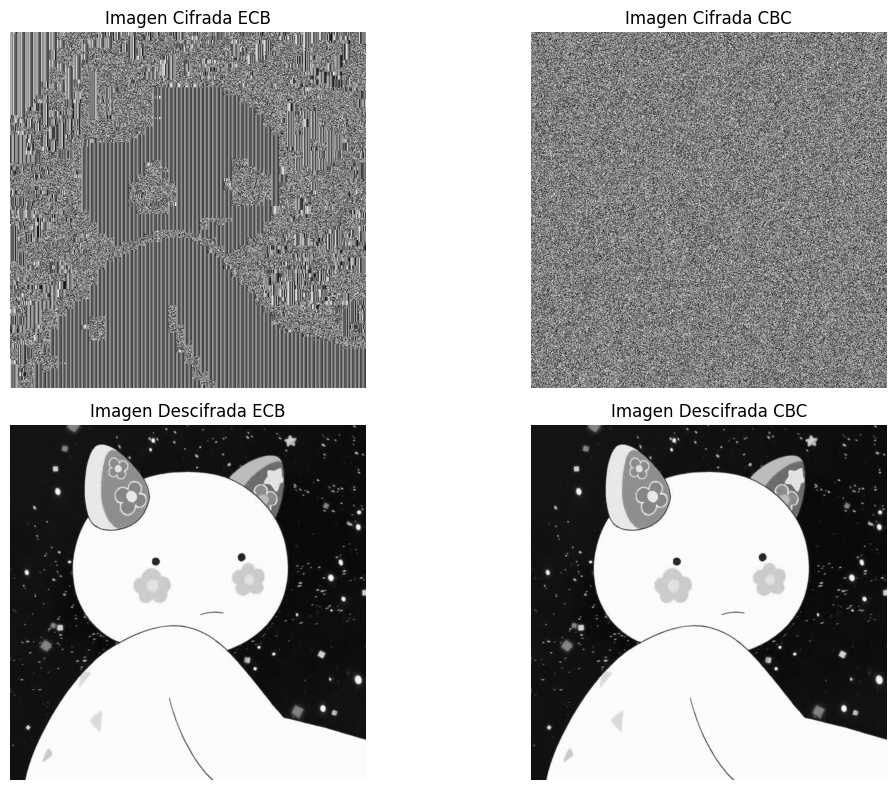

In [36]:
# Mostrar las imágenes cifradas y descifradas
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# Mostrar la imagen cifrada en ECB
axes[0, 0].imshow(encrypted_ecb_array, cmap="gray")
axes[0, 0].set_title("Imagen Cifrada ECB")
axes[0, 0].axis("off")

# Mostrar la imagen cifrada en CBC
axes[0, 1].imshow(encrypted_cbc_array, cmap="gray")
axes[0, 1].set_title("Imagen Cifrada CBC")
axes[0, 1].axis("off")

# Mostrar la imagen descifrada en ECB
axes[1, 0].imshow(decrypted_ecb_array, cmap="gray")
axes[1, 0].set_title("Imagen Descifrada ECB")
axes[1, 0].axis("off")

# Mostrar la imagen descifrada en CBC
axes[1, 1].imshow(decrypted_cbc_array, cmap="gray")
axes[1, 1].set_title("Imagen Descifrada CBC")
axes[1, 1].axis("off")

plt.tight_layout()
plt.show()

- ¿Por qué el cifrado ECB revela los patrones de la imagen?

Por el tipo de encriptacion que usa. Este hace que se encripte cada bloque individualmente, por lo que todavia se puede distinguir la imagen un poco

- ¿Cómo cambia la apariencia con CBC?

Con CBC vemos que la imagen tiene mucho ruido y no se puede diferenciar de la imagen cifrada

- ¿Qué tan seguro es usar ECB para cifrar datos estructurados?

No es muy seguro si se trabaja con informacion delicada ya que puede ser facil decifrarla